In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [4]:
df_clinical = pd.read_csv('TCGA-PAAD.clinical.tsv', sep='\t',index_col=0)
print(df_clinical.shape)
df_clinical.head()

(196, 88)


,id,disease_type,case_id,submitter_id,primary_site,cigarettes_per_day.exposures,alcohol_history.exposures,years_smoked.exposures,race.demographic,gender.demographic,...,initial_weight.samples,preservation_method.samples,intermediate_dimension.samples,pathology_report_uuid.samples,shortest_dimension.samples,oct_embedded.samples,specimen_type.samples,longest_dimension.samples,is_ffpe.samples,tissue_type.samples
sample,,,,,,,,,,,,,,,,,,,,,
TCGA-HZ-7918-01A,620e0648-ec20-4a12-a6cb-5546fe829c77,Ductal and Lobular Neoplasms,620e0648-ec20-4a12-a6cb-5546fe829c77,TCGA-HZ-7918,Pancreas,NaN,No,NaN,white,male,...,NaN,Unknown,0.9,66cc897f-570a-4f7d-b134-71ad8066d40e,0.4,NaN,Solid Tissue,1.0,False,Tumor
TCGA-3A-A9IS-01A,cf825b86-7ec2-4e90-bcce-3b5637b90b70,Adenomas and Adenocarcinomas,cf825b86-7ec2-4e90-bcce-3b5637b90b70,TCGA-3A-A9IS,Pancreas,NaN,No,NaN,white,male,...,80.0,OCT,NaN,BC3170CA-A046-4D78-9CC6-36C5B70A9C4C,NaN,True,Solid Tissue,NaN,False,Tumor
TCGA-HZ-7924-01A,ad220f0d-06b7-4dad-a87d-36dff31c8623,Ductal and Lobular Neoplasms,ad220f0d-06b7-4dad-a87d-36dff31c8623,TCGA-HZ-7924,Pancreas,NaN,No,NaN,white,female,...,NaN,Unknown,0.8,803bb8e5-9da4-4f72-92ae-d7cd4152a665,0.3,NaN,Solid Tissue,1.0,False,Tumor
TCGA-IB-AAUW-01A,18960eb6-2d79-4d12-886a-4cd1e8fc1e21,Ductal and Lobular Neoplasms,18960eb6-2d79-4d12-886a-4cd1e8fc1e21,TCGA-IB-AAUW,Pancreas,NaN,Yes,NaN,white,female,...,290.0,OCT,NaN,64606B7A-008D-459F-8E32-296016364BB1,NaN,True,Solid Tissue,NaN,False,Tumor
TCGA-2J-AABP-01A,a4569ce7-dde7-4660-a24c-409d294b2b8c,"Epithelial Neoplasms, NOS",a4569ce7-dde7-4660-a24c-409d294b2b8c,TCGA-2J-AABP,Pancreas,NaN,Yes,NaN,white,female,...,90.0,OCT,NaN,1AB545A6-DC90-47E9-8112-DD094F6BCD02,NaN,True,Solid Tissue,NaN,False,Tumor


In [5]:
print(df_clinical['ajcc_pathologic_stage.diagnoses'].value_counts())
print(df_clinical['ajcc_pathologic_n.diagnoses'].value_counts())
print(df_clinical[df_clinical['ajcc_pathologic_stage.diagnoses']=='Stage IIB']['ajcc_pathologic_n.diagnoses'].value_counts())
print(df_clinical[df_clinical['ajcc_pathologic_n.diagnoses']=='NX']['ajcc_pathologic_stage.diagnoses'].value_counts())
print(df_clinical[df_clinical['ajcc_pathologic_n.diagnoses']=='N0']['ajcc_pathologic_stage.diagnoses'].value_counts())

ajcc_pathologic_stage.diagnoses
Stage IIB    127
Stage IIA     33
Stage IB      15
Stage IV       7
Stage IA       5
Stage III      5
Stage I        1
Name: count, dtype: int64
ajcc_pathologic_n.diagnoses
N1     134
N0      52
NX       5
N1b      4
Name: count, dtype: int64
ajcc_pathologic_n.diagnoses
N1     123
N1b      4
Name: count, dtype: int64
ajcc_pathologic_stage.diagnoses
Stage IIA    3
Stage IB     1
Name: count, dtype: int64
ajcc_pathologic_stage.diagnoses
Stage IIA    28
Stage IB     13
Stage IA      5
Stage IV      3
Stage III     2
Name: count, dtype: int64


In [6]:
df_count= pd.read_csv('TCGA-PAAD.star_counts.tsv', sep='\t',index_col=0)
df_count=df_count.T
# df_count.columns = df_count.iloc[0]
# df_count = df_count[1:].reset_index(drop=True)
print(df_count.shape)
df_count.head()

(183, 60660)


Ensembl_ID,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
TCGA-IB-A6UG-01A,11.390706,0.000000,10.154818,9.252665,7.491853,8.330917,11.272630,11.002815,10.265615,10.075479,...,0.0,0.0,5.209453,0.0,0.0,0.0,7.383704,0.0,2.584963,5.459432
TCGA-3A-A9IU-01A,11.835656,1.000000,10.662668,9.840778,8.299208,8.761551,13.310187,10.740624,10.100662,10.528454,...,0.0,0.0,4.754888,0.0,0.0,0.0,8.317413,0.0,3.321928,4.459432
TCGA-FB-A545-01A,9.782998,0.000000,9.879583,8.543032,7.451211,6.129283,10.696968,10.071462,9.517669,9.596190,...,0.0,0.0,4.807355,0.0,0.0,0.0,6.918863,0.0,2.321928,4.459432
TCGA-IB-AAUQ-01A,10.091435,2.321928,9.929258,8.778077,7.426265,8.233620,12.656872,11.094078,10.593391,9.698705,...,0.0,1.0,4.169925,0.0,0.0,0.0,7.179909,0.0,2.321928,5.584963
TCGA-HV-A5A3-01A,10.411511,0.000000,10.166163,9.475733,7.761551,8.957102,12.939579,8.888743,8.951285,10.154818,...,0.0,1.0,4.321928,0.0,0.0,0.0,7.442943,0.0,0.000000,3.459432


In [13]:
matrix_count_subtype = pd.concat([df_count, df_clinical['ajcc_pathologic_n.diagnoses']], axis=1, join='inner')
print(matrix_count_subtype.shape)
matrix_count_subtype.head()

(183, 60661)


,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,ajcc_pathologic_n.diagnoses
TCGA-IB-A6UG-01A,11.390706,0.000000,10.154818,9.252665,7.491853,8.330917,11.272630,11.002815,10.265615,10.075479,...,0.0,5.209453,0.0,0.0,0.0,7.383704,0.0,2.584963,5.459432,N1
TCGA-3A-A9IU-01A,11.835656,1.000000,10.662668,9.840778,8.299208,8.761551,13.310187,10.740624,10.100662,10.528454,...,0.0,4.754888,0.0,0.0,0.0,8.317413,0.0,3.321928,4.459432,N1
TCGA-FB-A545-01A,9.782998,0.000000,9.879583,8.543032,7.451211,6.129283,10.696968,10.071462,9.517669,9.596190,...,0.0,4.807355,0.0,0.0,0.0,6.918863,0.0,2.321928,4.459432,N1
TCGA-IB-AAUQ-01A,10.091435,2.321928,9.929258,8.778077,7.426265,8.233620,12.656872,11.094078,10.593391,9.698705,...,1.0,4.169925,0.0,0.0,0.0,7.179909,0.0,2.321928,5.584963,N1
TCGA-HV-A5A3-01A,10.411511,0.000000,10.166163,9.475733,7.761551,8.957102,12.939579,8.888743,8.951285,10.154818,...,1.0,4.321928,0.0,0.0,0.0,7.442943,0.0,0.000000,3.459432,NX


In [ ]:
# 替换列值并重命名
matrix_count_subtype["label"] = matrix_count_subtype["ajcc_pathologic_n.diagnoses"].apply(
    lambda x: 0 if (pd.isna(x) or x == "N0") else 1
)

matrix_count_subtype.drop(columns=["ajcc_pathologic_n.diagnoses"], inplace=True)
matrix_count_subtype["label"].value_counts()


In [16]:
tcga_log2tpm =matrix_count_subtype.T

In [17]:
tcga_log2tpm 

,TCGA-IB-A6UG-01A,TCGA-3A-A9IU-01A,TCGA-FB-A545-01A,TCGA-IB-AAUQ-01A,TCGA-HV-A5A3-01A,TCGA-IB-7897-01A,TCGA-HV-AA8V-01A,TCGA-HV-A5A5-01A,TCGA-HZ-8638-01A,TCGA-F2-7276-01A,...,TCGA-2J-AAB9-01A,TCGA-IB-AAUT-01A,TCGA-OE-A75W-01A,TCGA-2J-AAB4-01A,TCGA-IB-7652-01A,TCGA-3A-A9I9-01A,TCGA-XN-A8T3-01A,TCGA-IB-7649-01A,TCGA-2J-AAB8-01A,TCGA-3A-A9IB-01A
ENSG00000000003.15,11.390706,11.835656,9.782998,10.091435,10.411511,10.725366,10.906139,10.878817,11.953469,11.724940,...,9.977280,10.777255,10.478770,10.992938,11.271463,10.743993,11.391781,10.979425,9.415742,11.480285
ENSG00000000005.6,0.000000,1.000000,0.000000,2.321928,0.000000,6.906891,1.000000,0.000000,2.321928,3.700440,...,0.000000,1.000000,2.000000,0.000000,1.584963,3.584963,2.000000,1.584963,2.584963,1.584963
ENSG00000000419.13,10.154818,10.662668,9.879583,9.929258,10.166163,10.666224,10.143383,10.082149,11.178665,10.861862,...,9.424166,9.802516,10.381543,10.327553,11.213712,10.415742,10.134426,9.638436,9.527477,10.558421
ENSG00000000457.14,9.252665,9.840778,8.543032,8.778077,9.475733,9.933691,9.348728,9.712527,11.367415,9.899357,...,8.209453,9.095397,8.409391,9.481799,10.130571,8.882643,9.438792,8.927778,9.142107,9.036174
ENSG00000000460.17,7.491853,8.299208,7.451211,7.426265,7.761551,8.447083,7.139551,7.285402,8.985842,7.813781,...,6.321928,7.129283,7.098032,7.672425,8.438792,7.087463,7.965784,6.584963,7.417853,7.930737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288670.1,7.383704,8.317413,6.918863,7.179909,7.442943,8.388017,7.539159,7.523562,8.491853,8.266787,...,6.686501,6.930737,7.707359,7.876517,8.727920,7.787903,7.294621,7.098032,7.539159,7.832890
ENSG00000288671.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000288674.1,2.584963,3.321928,2.321928,2.321928,0.000000,1.584963,2.584963,0.000000,3.321928,3.700440,...,1.000000,2.584963,1.000000,2.584963,3.169925,1.584963,2.000000,0.000000,2.000000,1.584963
ENSG00000288675.1,5.459432,4.459432,4.459432,5.584963,3.459432,4.807355,4.906891,4.906891,3.584963,5.087463,...,3.906891,3.807355,6.409391,4.321928,5.247928,6.321928,4.906891,3.000000,4.247928,4.643856


In [18]:

# 读入 GTEx TPM
gtex = pd.read_csv("gene_tpm_v10_pancreas.gct.gz", sep="\t", skiprows=2)

# 设置基因 ID 为 index
gtex = gtex.set_index("Name")
# Name 列是基因 ID，Description 是 symbol
gene_dict = gtex["Description"].to_dict()


# 去掉 Description 列
gtex = gtex.drop(columns=["Description"])

# log2 转换
gtex_log2tpm = np.log2(gtex + 1)

# 保存
# gtex_log2tpm.to_csv("GTEx_Pancreas_log2TPM.tsv", sep="\t")

In [19]:
gtex_log2tpm.loc["label"] = int(2)

In [20]:
gtex_log2tpm.iloc[:-1,:]

,GTEX-111CU-0526-SM-5EGHK,GTEX-111YS-1226-SM-5EGGJ,GTEX-1122O-0726-SM-5GIEV,GTEX-1128S-0826-SM-5GZZI,GTEX-117YX-0226-SM-5EGH6,GTEX-11DXX-0926-SM-5H112,GTEX-11DXZ-0826-SM-HAV1R,GTEX-11EMC-0626-SM-HAV2O,GTEX-11EQ9-1026-SM-5H134,GTEX-11GSP-0426-SM-5A5KX,...,GTEX-ZV7C-0726-SM-59HKH,GTEX-ZVP2-0726-SM-59HKY,GTEX-ZVT2-2026-SM-5NQ8Q,GTEX-ZVZP-0626-SM-59HL5,GTEX-ZXES-0526-SM-5E45D,GTEX-ZY6K-0926-SM-HL9S4,GTEX-ZYFG-0826-SM-5BC5T,GTEX-ZYW4-2126-SM-59HJ9,GTEX-ZYY3-0826-SM-5E44R,GTEX-ZZPU-0726-SM-5N9C8
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.021251,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.020199,0.016284,0.025400,0.000000,0.026838,0.049827
ENSG00000227232.5,0.764647,0.767523,1.162403,2.061814,0.602919,1.110463,1.758171,1.644664,1.408022,0.560839,...,1.556812,1.385917,1.467593,1.476008,0.911602,2.021195,1.154214,1.111826,1.563549,1.523983
ENSG00000278267.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000243485.5,0.060563,0.000000,0.037557,0.000000,0.051248,0.000000,0.031789,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.040908,0.000000,0.032331,0.098856,0.000000,0.000000,0.049742
ENSG00000237613.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.030205,0.037918,0.000000,0.029181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,11.512869,11.406949,11.803130,9.138594,11.834779,10.784692,10.688373,8.270309,12.099223,7.952910,...,12.597596,12.479712,11.945707,11.830341,11.883376,10.385711,11.437955,9.467864,9.407833,12.220194
ENSG00000210194.1,3.682349,3.387130,4.160396,0.484817,3.678094,2.449398,2.027101,0.000000,3.384544,0.817246,...,4.379191,4.274165,3.662798,4.046316,3.814786,2.231952,3.431844,2.042091,1.527120,4.379392
ENSG00000198727.2,13.056733,13.433612,13.611901,13.003379,13.073281,12.894964,13.324082,11.439706,13.391713,11.592728,...,13.286308,13.194160,13.475024,13.414738,13.000954,12.596318,13.221753,13.651085,12.983282,13.700386


In [22]:

common_genes = tcga_log2tpm .index.intersection(gtex_log2tpm.index)

tcga_sub = tcga_log2tpm .loc[common_genes]
gtex_sub = gtex_log2tpm .loc[common_genes]

# 合并
combined = pd.concat([tcga_sub, gtex_sub], axis=1)

combined.index = combined.index.map(lambda x: gene_dict.get(x, x))
print(combined.shape)


(52740, 545)


In [23]:
# 1. 读取 count 矩阵（行为基因，列为样本）
df = combined

# 2. 计算 CPM（Counts Per Million）
# CPM = (raw_counts / library_size) * 1e6
library_sizes = df.sum(axis=0)
cpm = df.div(library_sizes, axis=1) * 1e6

# 3. 过滤低表达基因：
# 保留在至少N个样本中，CPM > 1 的基因
min_samples = int(df.shape[1] * 0.5)  # 例如，超过50%的样本
keep_genes = (cpm > 1).sum(axis=1) >= min_samples

# 4. 应用过滤
filtered_df = df[keep_genes]

print(f"原始基因数: {df.shape[0]}, 过滤后保留基因数: {filtered_df.shape[0]}")



原始基因数: 52740, 过滤后保留基因数: 23307


In [ ]:

gene_var = filtered_df.var(axis=1)

# 基于基因变异程度（variance / dispersion）的过滤适合快速去掉低信息量,基因取 top 2000 HVGs (或 top 10%) 
top_n = int(filtered_df.shape[0]*0.1)
hvg = gene_var.sort_values(ascending=False).head(top_n).index
filtered_hvg = filtered_df.loc[hvg]



In [ ]:
label_row = combined.loc['label']

# 让它变成一行 DataFrame，行名就是 "label"
label_df = pd.DataFrame([label_row], index=['label'])

# 拼接到最下方
filtered_with_label = pd.concat([filtered_hvg, label_df], axis=0)

filtered_with_label.to_csv("filtered_matrix_1stlabel.tsv", sep="\t")

In [81]:
filtered_with_label.T.loc[matrix_count_subtype.index].T.to_csv("filtered_matrix_2ndlabel.tsv", sep="\t")

In [ ]:
##### first layer

In [130]:
filtered_1stlabel= pd.read_csv("filtered_matrix_1stlabel.tsv", sep="\t", index_col=0)
X = filtered_1stlabel.T.drop(columns=['label']).copy()
y = filtered_1stlabel.T['label'].copy()

# 假设 y 已经是一个 Series
y = y.replace({0: 1, 1: 1, 2: 0})
X.astype(float)
y = y.astype(str)
print(y.value_counts())
print(X.shape,y.shape)


label
0.0    362
1.0    183
Name: count, dtype: int64
(545, 2331) (545,)


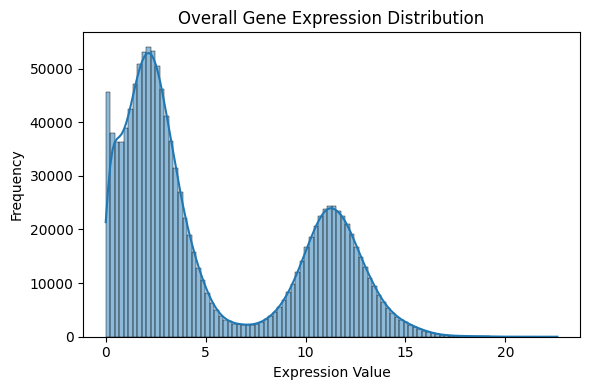

In [45]:
import seaborn as sns

all_expr = X.values.flatten()
plt.figure(figsize=(6,4))
sns.histplot(all_expr, bins=100, kde=True)
plt.title("Overall Gene Expression Distribution")
plt.xlabel("Expression Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


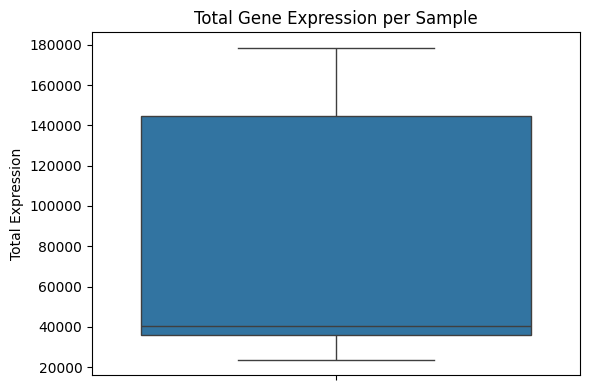

In [23]:
sample_sums = X.sum(axis=1)
plt.figure(figsize=(6,4))
sns.boxplot(data=sample_sums)
plt.title("Total Gene Expression per Sample")
plt.ylabel("Total Expression")
plt.tight_layout()
plt.show()


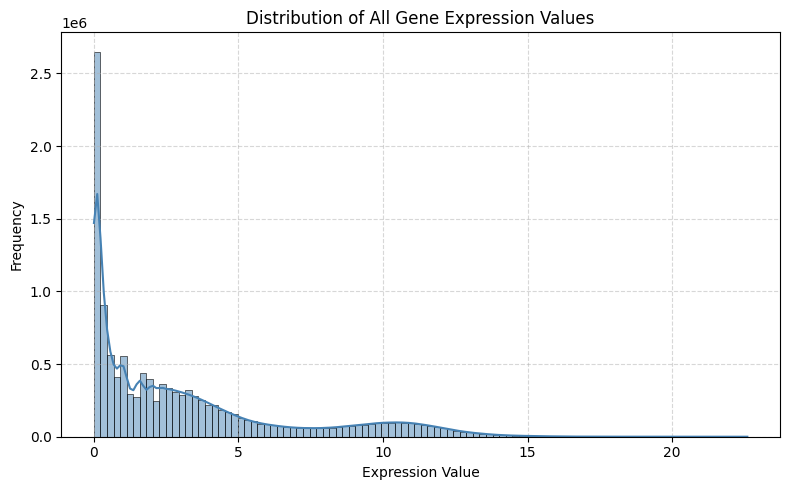

In [24]:
# 获取所有表达值（183个样本 × 31760个基因）拉平成1维数组
all_expr = X.values.flatten()

# 绘图
plt.figure(figsize=(8, 5))
sns.histplot(all_expr, bins=100, kde=True, color="steelblue")
plt.title("Distribution of All Gene Expression Values")
plt.xlabel("Expression Value")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


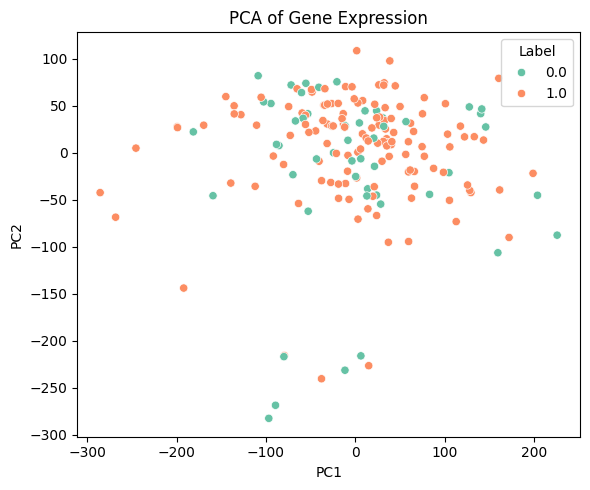

In [103]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Label'] = y.values

plt.figure(figsize=(6, 5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Label', palette='Set2')
plt.title("PCA of Gene Expression")
plt.tight_layout()
plt.show()


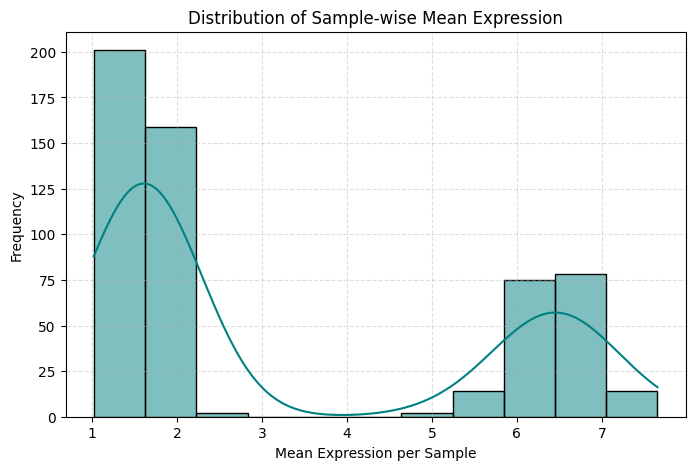

In [25]:
sample_means = X.mean(axis=1)  # 每个样本平均表达值

plt.figure(figsize=(8,5))
sns.histplot(sample_means, kde=True, color='teal')
plt.title("Distribution of Sample-wise Mean Expression")
plt.xlabel("Mean Expression per Sample")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()



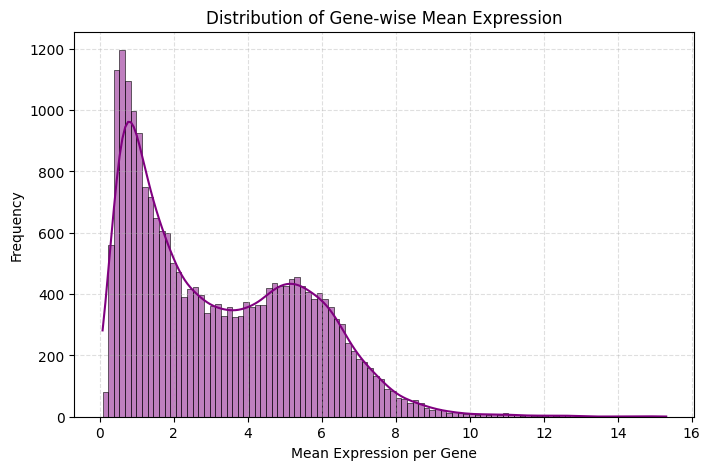

In [65]:
gene_means = X.mean(axis=0)  # 每个基因在所有样本的平均表达

plt.figure(figsize=(8,5))
sns.histplot(gene_means, bins=100, kde=True, color='purple')
plt.title("Distribution of Gene-wise Mean Expression")
plt.xlabel("Mean Expression per Gene")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


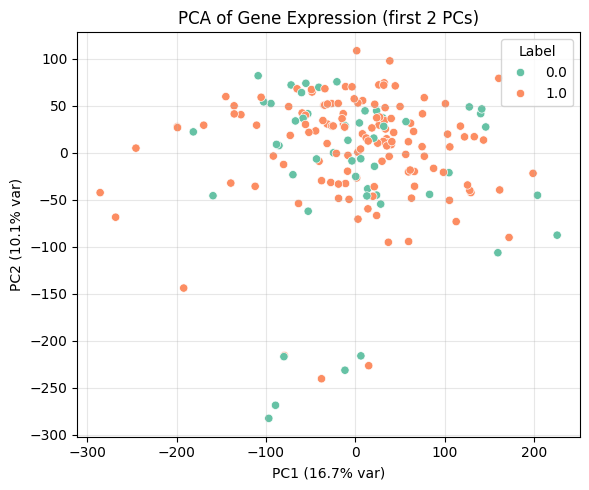

In [106]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set2')
plt.title("PCA of Gene Expression (first 2 PCs)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.legend(title='Label')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [131]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np

try:
    from xgboost import XGBClassifier
    xgb_installed = True
except ImportError:
    xgb_installed = False

# ===== 这里假设 X, y_encoded 已经在上面构造好 =====

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(),
}

if xgb_installed:
    models["XGBoost"] = XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',   # 多分类时也 OK
        random_state=42
    )

trained_models = {}

n_classes = len(le.classes_)
print("Classes:", le.classes_, " (n =", n_classes, ")")

for name, model in models.items():
    print("\n==============================")
    print(f"Model: {name}")

    # --- 针对 XGBoost 单独用 numpy array ---
    if name == "XGBoost":
        model.fit(X_train.values, y_train)
        y_pred = model.predict(X_test.values)
        y_proba = model.predict_proba(X_test.values)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)

    # ---------- Accuracy ----------
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)

    # ---------- AUC ----------
    try:
        if n_classes == 2:
            # 二分类：取正类概率（LabelEncoder 默认按字母顺序编码）
            # 正类：le.classes_[1]
            y_proba_pos = y_proba[:, 1]
            auc = roc_auc_score(y_test, y_proba_pos)
        else:
            # 多分类：macro AUC（OvR）
            auc = roc_auc_score(
                y_test,
                y_proba,
                multi_class="ovr",
                average="macro"
            )
        print("AUC:", auc)
    except Exception as e:
        print("AUC cannot be computed:", e)

    # ---------- Classification report ----------
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    trained_models[name] = model


Classes: ['0.0' '1.0']  (n = 2 )

Model: Random Forest
Accuracy: 0.7567567567567568
AUC: 0.4962962962962963
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.10      0.18        10
         1.0       0.75      1.00      0.86        27

    accuracy                           0.76        37
   macro avg       0.88      0.55      0.52        37
weighted avg       0.82      0.76      0.67        37


Model: Logistic Regression
Accuracy: 0.6756756756756757
AUC: 0.4555555555555555
Classification Report:
              precision    recall  f1-score   support

         0.0       0.33      0.20      0.25        10
         1.0       0.74      0.85      0.79        27

    accuracy                           0.68        37
   macro avg       0.54      0.53      0.52        37
weighted avg       0.63      0.68      0.65        37


Model: SVM
Accuracy: 0.7297297297297297
AUC: 0.5222222222222221
Classification Report:
              precision

/home/peigao/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/peigao/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/peigao/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

Accuracy: 0.6486486486486487
AUC: 0.5259259259259259
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.71      0.89      0.79        27

    accuracy                           0.65        37
   macro avg       0.35      0.44      0.39        37
weighted avg       0.52      0.65      0.57        37


Model: XGBoost


/home/peigao/miniconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [20:47:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7297297297297297
AUC: 0.6185185185185186
Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.20      0.29        10
         1.0       0.76      0.93      0.83        27

    accuracy                           0.73        37
   macro avg       0.63      0.56      0.56        37
weighted avg       0.69      0.73      0.69        37



In [132]:
trained_models

{'Random Forest': RandomForestClassifier(random_state=42),
 'Logistic Regression': LogisticRegression(max_iter=1000, solver='liblinear'),
 'SVM': SVC(probability=True),
 'KNN': KNeighborsClassifier(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='mlogloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, 

In [133]:
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance

# -------- 基础信息 --------
feature_names = pd.Index(X.columns)

print("是否有重复基因名:", feature_names.duplicated().any())
if feature_names.duplicated().any():
    dup_genes = feature_names[feature_names.duplicated()].unique()
    print("重复基因示例:", dup_genes[:10])

# 二分类 / 多分类，选择合适 scoring
n_classes = len(le.classes_)
if n_classes == 2:
    scoring_metric = "roc_auc"
else:
    scoring_metric = "roc_auc_ovr"

importance_dict = {}  # {model_name: Series(importance, index=gene)}

for name, model in trained_models.items():
    print(f"\nProcessing feature importance for: {name}")
    imp = None

    # 1) 树模型：RF, GB, XGB
    if hasattr(model, "feature_importances_"):
        print("  -> use feature_importances_")
        imp = model.feature_importances_

    # 2) 线性模型：LogisticRegression, 线性SVM（有 coef_）
    elif hasattr(model, "coef_"):
        print("  -> use coef_ as importance")
        coef = model.coef_
        if coef.ndim == 2:
            imp = np.mean(np.abs(coef), axis=0)
        else:
            imp = np.abs(coef.ravel())

    # 3) 其他（比如 rbf SVM, KNN）：用 permutation importance
    else:
        print("  -> use permutation_importance")
        result = permutation_importance(
            model,
            X_test,
            y_test,
            n_repeats=20,
            random_state=42,
            n_jobs=-1,
            scoring=scoring_metric,
        )
        imp = result.importances_mean

    # ---- 构造 Series，index = 基因名 ----
    s = pd.Series(imp, index=feature_names, name=name)

    # 如果基因名有重复，对重复基因做合并（这里取平均）
    if s.index.duplicated().any():
        s = s.groupby(level=0).mean()

    # 归一化（方便不同模型比较）
    if s.sum() != 0:
        s = s / s.sum()

    # 统一按从大到小排序
    s = s.sort_values(ascending=False)
    importance_dict[name] = s

    print("  Top 5 genes for this model:")
    print(s.head(5))

# -------- 汇总到一个 DataFrame：行=模型，列=基因 --------
importance_df = pd.DataFrame(importance_dict).T   # shape: (n_models, n_unique_genes)
print("\nimportance_df shape:", importance_df.shape)
importance_df.to_csv("PAAD_2nd_feature_importances.tsv", sep="\t")

# # -------- 跨模型平均重要性 --------
# gene_importance_mean = importance_df.mean(axis=0)  # 对每个基因跨模型取平均
# gene_importance_mean_sorted = gene_importance_mean.sort_values(ascending=False)

# print("\nTop 20 genes (mean importance across models):")
# print(gene_importance_mean_sorted.head(20))

# # -------- 选前 10% 重要基因 --------
# threshold = gene_importance_mean.quantile(0.9)   # 前 10% 的分位数
# important_genes = gene_importance_mean[gene_importance_mean >= threshold].index.tolist()

# print(f"\n总基因数: {len(gene_importance_mean)}")
# print(f"Top 10% 阈值: {threshold}")
# print(f"重要基因数量 (前10%): {len(important_genes)}")
# print("前 20 个重要基因:")
# print(important_genes[:20])

# # -------- 保存结果，方便下游富集分析 --------
# gene_importance_mean_sorted.to_csv(
#     "PAAD_gene_importance_mean_6models.tsv",
#     sep="\t"
# )

# pd.Series(important_genes, name="gene").to_csv(
#     "PAAD_important_genes_top10percent_6models.txt",
#     index=False,
#     header=False
# )


是否有重复基因名: True
重复基因示例: Index(['RGS5'], dtype='object')

Processing feature importance for: Random Forest
  -> use feature_importances_
  Top 5 genes for this model:
SYT11     0.007545
RAB3B     0.007149
ADAM15    0.005493
DMBT1     0.005214
TRPM4     0.005025
Name: Random Forest, dtype: float64

Processing feature importance for: Logistic Regression
  -> use coef_ as importance
  Top 5 genes for this model:
S100A2      0.004465
DMBT1       0.003707
CHGB        0.003458
PAX8-AS1    0.003323
ERAP2       0.003015
Name: Logistic Regression, dtype: float64

Processing feature importance for: SVM
  -> use permutation_importance
  Top 5 genes for this model:
RPS4Y1     0.017514
AQP5       0.012878
KLK6       0.012106
PPY        0.012106
SLC6A14    0.011590
Name: SVM, dtype: float64

Processing feature importance for: KNN
  -> use permutation_importance
  Top 5 genes for this model:
PNLIP     0.037601
RPS4Y1    0.035452
CLPS      0.026732
OLFM4     0.026163
ERN2      0.025594
Name: KNN, dtype:

In [134]:
# -------- 对每个模型取前 10% 的重要基因 --------
model_top_genes = {}  # {model_name: set(genes)}

for name, s in importance_dict.items():
    # s 是某个模型的 Series：index=gene, value=importance (已归一化)
    # 确保是从大到小排序的，如果上面没排序可以加一行：
    s_sorted = s.sort_values(ascending=False)

    # 该模型自己的 90% 分位数阈值
    thr = s_sorted.quantile(0.9)

    top_genes = s_sorted[s_sorted >= thr].index
    model_top_genes[name] = set(top_genes)

    print(f"{name}: top 10% 基因数 = {len(top_genes)}")

# 你可以看一下某个模型的前几个基因
for name, genes in model_top_genes.items():
    print(f"\n{name} top genes 示例:")
    print(list(genes)[:10])


Random Forest: top 10% 基因数 = 233
Logistic Regression: top 10% 基因数 = 233
SVM: top 10% 基因数 = 250
KNN: top 10% 基因数 = 233
Gradient Boosting: top 10% 基因数 = 233
XGBoost: top 10% 基因数 = 2330

Random Forest top genes 示例:
['ASPHD2', 'ERAP1', 'DMBT1', 'PDZD2', 'EPS8L3', 'FLRT3', 'TNXB', 'CTRB2', 'ZNF462', 'ITFG1']

Logistic Regression top genes 示例:
['TMEM44', 'SLC16A4', 'CNDP2', 'ABCB1', 'TGFBI', 'SLC26A9', 'SPN', 'PAX8-AS1', 'DMBT1', 'FLRT3']

SVM top genes 示例:
['ABCB1', 'TGFBI', 'SLC26A9', 'DMBT1', 'PAX8-AS1', 'NKD1', 'CTRB2', 'ZNF462', 'CHIT1', 'BPIFB1']

KNN top genes 示例:
['SLC16A4', 'ACP5', 'SLC26A9', 'SPN', 'PAX8-AS1', 'DMBT1', 'TGM2', 'FGD5', 'TMC5', 'ANLN']

Gradient Boosting top genes 示例:
['DHCR24', 'SAMD4A', 'ABCB1', 'DMBT1', 'PDZD2', 'CD82', 'FLRT3', 'FGD5', 'MADD', 'MAN2B2']

XGBoost top genes 示例:
['C1R', 'PTK2', 'CD276', 'FARP1', 'TRERF1', 'DMBT1', 'SPN', 'ZNF462', 'PHF14', 'SYNJ2']


/home/peigao/miniconda3/lib/python3.13/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/peigao/miniconda3/lib/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inp

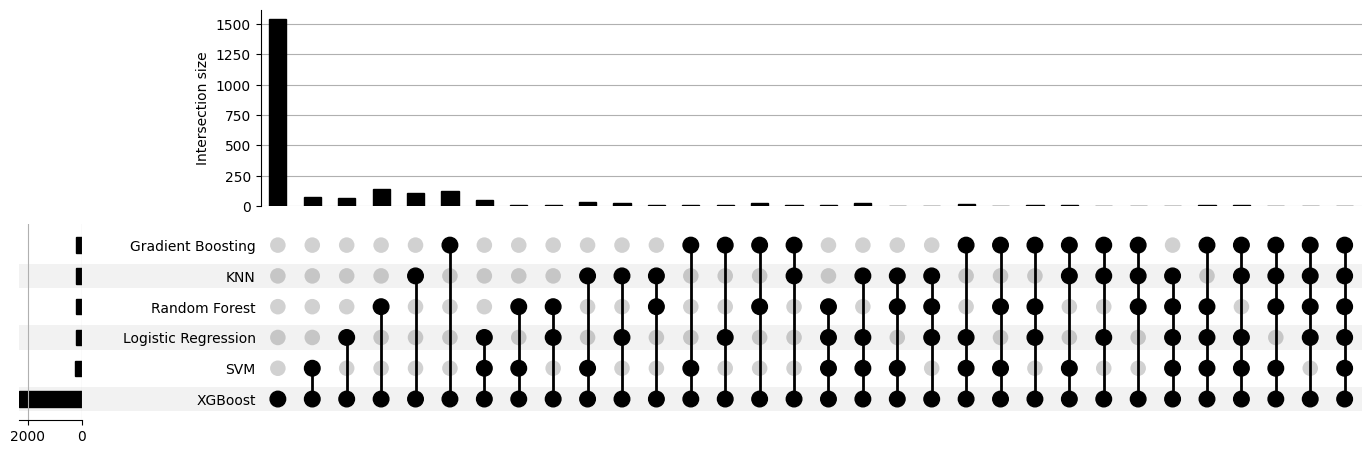

In [135]:
from upsetplot import from_contents, UpSet

upset_data = from_contents(model_top_genes)
UpSet(upset_data).plot()
plt.show()


In [136]:
from collections import Counter
# common_genes = set.intersection(*model_top_genes.values())

# print("所有模型共同的重要基因数量:", len(common_genes))
# print(list(common_genes))

# 统计每个基因在多少个模型中出现
gene_counter = Counter()

for model_name, gene_set in model_top_genes.items():
    gene_counter.update(gene_set)

# 至少在 4 个模型中出现
genes_in_4plus_models = [gene for gene, count in gene_counter.items() if count >= 4]

print("至少 4 个模型认为重要的基因数量:", len(genes_in_4plus_models))
print("示例:", genes_in_4plus_models[:30])


至少 4 个模型认为重要的基因数量: 93
示例: ['DMBT1', 'FLRT3', 'CTRB2', 'KRT23', 'COL11A1', 'PITX1', 'FOXL1', 'STEAP2', 'BDH1', 'CHGB', 'MPEG1', 'SFRP1', 'LCN2', 'TM4SF1', 'IGLC3', 'F5', 'VCAM1', 'EMILIN2', 'RAB3B', 'RGS4', 'PCSK2', 'S100A6', 'RGS5', 'B4GALT4', 'CDK14', 'EPHB2', 'TMPRSS3', 'SULT1B1', 'ITGA5', 'IFIT1']


In [ ]:
import gseapy as gp
import pandas as pd
# 至少 4 个模型认为重要的基因
# genes_in_4plus_models 是一个 list 或 set
gene_list = list(genes_in_4plus_models)
print("交集基因数:", len(gene_list))
print(gene_list[:10])

gene_sets = [
    "GO_Biological_Process_2021",
    "GO_Molecular_Function_2021",
    "GO_Cellular_Component_2021",
]

enr = gp.enrichr(
    gene_list=gene_list,
    gene_sets=gene_sets,
    organism="Human",   # 人类
    cutoff=0.05         # 默认以 Adjusted P-value / FDR 过滤
)

# 结果 DataFrame
go_res = enr.results
print(go_res.head())

# 生物学过程（BP）
res_bp = go_res[go_res["Gene_set"] == "GO_Biological_Process_2021"] \
             .sort_values("Adjusted P-value")
# 分子功能（MF）
res_mf = go_res[go_res["Gene_set"] == "GO_Molecular_Function_2021"] \
             .sort_values("Adjusted P-value")
# 细胞组分（CC）
res_cc = go_res[go_res["Gene_set"] == "GO_Cellular_Component_2021"] \
             .sort_values("Adjusted P-value")

print("BP 前10条：")
print(res_bp.head(10)[["Term", "Adjusted P-value", "Overlap", "Genes"]])

def filter_by_overlap(df, min_genes=2):
    """
    过滤掉重叠基因数 < min_genes 的条目。
    min_genes=2 表示至少要命中 2 个基因。
    """
    df = df.copy()
    df["Overlap_gene_count"] = df["Overlap"].apply(lambda x: int(x.split("/")[0]))
    df = df[df["Overlap_gene_count"] >= min_genes]
    return df.drop(columns=["Overlap_gene_count"])
res_bp_filt = filter_by_overlap(res_bp, min_genes=2)
res_mf_filt = filter_by_overlap(res_mf, min_genes=2)
res_cc_filt = filter_by_overlap(res_cc, min_genes=2)

print("过滤后 BP 条目数:", res_bp_filt.shape[0])
print("过滤后 MF 条目数:", res_mf_filt.shape[0])
print("过滤后 CC 条目数:", res_cc_filt.shape[0])

# 导出到文件，方便看表或丢给 R/Excel
res_bp_filt.to_csv("GO_BP_enrich_1stlabel_genes_4plus_models.tsv", sep="\t", index=False)
res_mf_filt.to_csv("GO_MF_enrich_1stlabel_genes_4plus_models.tsv", sep="\t", index=False)
res_cc_filt.to_csv("GO_CC_enrich_1stlabel_genes_4plus_models.tsv", sep="\t", index=False)



交集基因数: 93
['DMBT1', 'FLRT3', 'CTRB2', 'KRT23', 'COL11A1', 'PITX1', 'FOXL1', 'STEAP2', 'BDH1', 'CHGB']
                     Gene_set  \
0  GO_Molecular_Function_2021   
1  GO_Molecular_Function_2021   
2  GO_Molecular_Function_2021   
3  GO_Molecular_Function_2021   
4  GO_Molecular_Function_2021   

                                                Term Overlap   P-value  \
0                specific granule lumen (GO:0035580)    5/62  0.000010   
1                      specific granule (GO:0042581)   6/160  0.000102   
2                              podosome (GO:0002102)    2/13  0.001614   
3  collagen-containing extracellular matrix (GO:0...   7/380  0.001976   
4                tertiary granule lumen (GO:1904724)    3/55  0.002144   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.001157            0                     0   19.786683   
1          0.005789            0                     0    8.845947   
2          0.048448            0            

In [ ]:
# second layer

In [92]:
param_grids = {
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5]
    },
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ['l1', 'l2'],
        "solver": ['liblinear']
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ['linear', 'rbf'],
        "gamma": ['scale', 'auto']
    },
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ['uniform', 'distance']
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "subsample": [0.8, 1],
        "colsample_bytree": [0.8, 1]
    }
}


In [97]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import pandas as pd

try:
    from xgboost import XGBClassifier
    xgb_installed = True
except ImportError:
    xgb_installed = False

# ========= 1. 读取 & 准备数据 =========
filtered_2ndlabel = pd.read_csv("filtered_matrix_2ndlabel.tsv", sep="\t", index_col=0)

# 行: 基因+label, 列: 样本  →  转置后行: 样本, 列: 基因+label
X = filtered_2ndlabel.T.drop(columns=['label']).copy()
y = filtered_2ndlabel.T['label'].copy()

X = X.astype(float)
y = y.astype(str)

print("Label counts:\n", y.value_counts())
print("X shape:", X.shape, " y shape:", y.shape)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=2025, stratify=y_encoded
)

n_classes = len(le.classes_)
print("Classes:", le.classes_, " (n_classes =", n_classes, ")")

# ========= 2. 模型和参数网格 =========
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

if xgb_installed:
    models["XGBoost"] = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',   # 多分类也OK
        random_state=42
    )

# 你自己的 param_grids（这里给个例子，可以按需改）
param_grids = {
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 5, 10]
    },
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["rbf", "linear"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1]
    },
}

if xgb_installed:
    param_grids["XGBoost"] = {
        "n_estimators": [100, 200],
        "max_depth": [3, 5],
        "learning_rate": [0.05, 0.1]
    }

# 根据分类任务选择合适的 AUC scoring
if n_classes == 2:
    scoring_metric = "roc_auc"
else:
    scoring_metric = "roc_auc_ovr"

trained_models = {}

# ========= 3. 训练 + 调参 + 评估 =========
for name, model in models.items():
    print("\n==============================")
    print(f"Searching best params for {name} ...")

    # ---- 关键：XGBoost 用 numpy array 避免 pandas 兼容性问题 ----
    if name == "XGBoost":
        X_train_fit = X_train.values
        X_test_fit = X_test.values
    else:
        X_train_fit = X_train
        X_test_fit = X_test

    param_grid = param_grids.get(name, {})

    if param_grid:
        grid_search = GridSearchCV(
            model,
            param_grid,
            cv=5,
            scoring=scoring_metric,
            n_jobs=-1
        )
        grid_search.fit(X_train_fit, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best params for {name}: {grid_search.best_params_}")
    else:
        best_model = model.fit(X_train_fit, y_train)

    # 预测
    y_pred = best_model.predict(X_test_fit)
    y_proba = best_model.predict_proba(X_test_fit)

    # 准确率
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print("Accuracy:", acc)

    # AUC
    try:
        if n_classes == 2:
            # 二分类：取正类概率（LabelEncoder 第二个类）
            y_proba_pos = y_proba[:, 1]
            auc = roc_auc_score(y_test, y_proba_pos)
        else:
            # 多分类：One-vs-Rest 宏平均 AUC
            auc = roc_auc_score(
                y_test,
                y_proba,
                multi_class="ovr",
                average="macro"
            )
        print("AUC:", auc)
    except Exception as e:
        print("AUC cannot be computed:", e)

    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n",
          classification_report(y_test, y_pred, target_names=le.classes_))

    trained_models[name] = best_model


Label counts:
 label
1.0    132
0.0     51
Name: count, dtype: int64
X shape: (183, 2331)  y shape: (183,)
Classes: ['0.0' '1.0']  (n_classes = 2 )

Searching best params for Random Forest ...
Best params for Random Forest: {'max_depth': None, 'n_estimators': 100}

Model: Random Forest
Accuracy: 0.7567567567567568
AUC: 0.4962962962962963
Confusion Matrix:
 [[ 1  9]
 [ 0 27]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.10      0.18        10
         1.0       0.75      1.00      0.86        27

    accuracy                           0.76        37
   macro avg       0.88      0.55      0.52        37
weighted avg       0.82      0.76      0.67        37


Searching best params for Logistic Regression ...
Best params for Logistic Regression: {'C': 0.01}

Model: Logistic Regression
Accuracy: 0.7027027027027027
AUC: 0.4444444444444444
Confusion Matrix:
 [[ 0 10]
 [ 1 26]]
Classification Report:
               precision    r

/home/peigao/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/peigao/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/peigao/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]


Model: KNN
Accuracy: 0.6486486486486487
AUC: 0.4703703703703703
Confusion Matrix:
 [[ 1  9]
 [ 4 23]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.20      0.10      0.13        10
         1.0       0.72      0.85      0.78        27

    accuracy                           0.65        37
   macro avg       0.46      0.48      0.46        37
weighted avg       0.58      0.65      0.60        37


Searching best params for Gradient Boosting ...
Best params for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 100}

Model: Gradient Boosting
Accuracy: 0.6486486486486487
AUC: 0.5518518518518518
Confusion Matrix:
 [[ 0 10]
 [ 3 24]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.71      0.89      0.79        27

    accuracy                           0.65        37
   macro avg       0.35      0.44      0.39        37
weigh

/home/peigao/miniconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:03:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/peigao/miniconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:03:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/peigao/miniconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:03:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/peigao/miniconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [19:03:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/peigao/miniconda3/lib/python3.13/site-pack

Best params for XGBoost: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}

Model: XGBoost
Accuracy: 0.7027027027027027
AUC: 0.6444444444444444
Confusion Matrix:
 [[ 0 10]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.72      0.96      0.83        27

    accuracy                           0.70        37
   macro avg       0.36      0.48      0.41        37
weighted avg       0.53      0.70      0.60        37



In [98]:
trained_models

{'Random Forest': RandomForestClassifier(random_state=42),
 'Logistic Regression': LogisticRegression(C=0.01, max_iter=1000, solver='liblinear'),
 'SVM': SVC(C=1, probability=True),
 'KNN': KNeighborsClassifier(),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.05, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=N

In [ ]:
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance

# -------- 基础信息 --------
feature_names = pd.Index(X.columns)

print("是否有重复基因名:", feature_names.duplicated().any())
if feature_names.duplicated().any():
    dup_genes = feature_names[feature_names.duplicated()].unique()
    print("重复基因示例:", dup_genes[:10])

# 二分类 / 多分类，选择合适 scoring
n_classes = len(le.classes_)
if n_classes == 2:
    scoring_metric = "roc_auc"
else:
    scoring_metric = "roc_auc_ovr"

importance_dict = {}  # {model_name: Series(importance, index=gene)}

for name, model in trained_models.items():
    print(f"\nProcessing feature importance for: {name}")
    imp = None

    # 1) 树模型：RF, GB, XGB
    if hasattr(model, "feature_importances_"):
        print("  -> use feature_importances_")
        imp = model.feature_importances_

    # 2) 线性模型：LogisticRegression, 线性SVM（有 coef_）
    elif hasattr(model, "coef_"):
        print("  -> use coef_ as importance")
        coef = model.coef_
        if coef.ndim == 2:
            imp = np.mean(np.abs(coef), axis=0)
        else:
            imp = np.abs(coef.ravel())

    # 3) 其他（比如 rbf SVM, KNN）：用 permutation importance
    else:
        print("  -> use permutation_importance")
        result = permutation_importance(
            model,
            X_test,
            y_test,
            n_repeats=20,
            random_state=42,
            n_jobs=-1,
            scoring=scoring_metric,
        )
        imp = result.importances_mean

    # ---- 构造 Series，index = 基因名 ----
    s = pd.Series(imp, index=feature_names, name=name)

    # 如果基因名有重复，对重复基因做合并（这里取平均）
    if s.index.duplicated().any():
        s = s.groupby(level=0).mean()

    # 归一化（方便不同模型比较）
    if s.sum() != 0:
        s = s / s.sum()

    # 统一按从大到小排序
    s = s.sort_values(ascending=False)
    importance_dict[name] = s

    print("  Top 5 genes for this model:")
    print(s.head(5))

# -------- 汇总到一个 DataFrame：行=模型，列=基因 --------
importance_df = pd.DataFrame(importance_dict).T   # shape: (n_models, n_unique_genes)
print("\nimportance_df shape:", importance_df.shape)
importance_df.to_csv("PAAD_2nd_feature_importances.tsv", sep="\t")

# # -------- 跨模型平均重要性 --------
# gene_importance_mean = importance_df.mean(axis=0)  # 对每个基因跨模型取平均
# gene_importance_mean_sorted = gene_importance_mean.sort_values(ascending=False)

# print("\nTop 20 genes (mean importance across models):")
# print(gene_importance_mean_sorted.head(20))

# # -------- 选前 10% 重要基因 --------
# threshold = gene_importance_mean.quantile(0.9)   # 前 10% 的分位数
# important_genes = gene_importance_mean[gene_importance_mean >= threshold].index.tolist()

# print(f"\n总基因数: {len(gene_importance_mean)}")
# print(f"Top 10% 阈值: {threshold}")
# print(f"重要基因数量 (前10%): {len(important_genes)}")
# print("前 20 个重要基因:")
# print(important_genes[:20])

# # -------- 保存结果，方便下游富集分析 --------
# gene_importance_mean_sorted.to_csv(
#     "PAAD_gene_importance_mean_6models.tsv",
#     sep="\t"
# )

# pd.Series(important_genes, name="gene").to_csv(
#     "PAAD_important_genes_top10percent_6models.txt",
#     index=False,
#     header=False
# )


是否有重复基因名: True
重复基因示例: Index(['RGS5'], dtype='object')

Processing feature importance for: Random Forest
  -> use feature_importances_
  Top 5 genes for this model:
SYT11     0.007545
RAB3B     0.007149
ADAM15    0.005493
DMBT1     0.005214
TRPM4     0.005025
Name: Random Forest, dtype: float64

Processing feature importance for: Logistic Regression
  -> use coef_ as importance
  Top 5 genes for this model:
S100A2      0.004081
CHGB        0.003903
DMBT1       0.003778
PAX8-AS1    0.003559
KRT23       0.003204
Name: Logistic Regression, dtype: float64

Processing feature importance for: SVM
  -> use permutation_importance
  Top 5 genes for this model:
RPS4Y1     0.017514
AQP5       0.012878
KLK6       0.012106
PPY        0.012106
SLC6A14    0.011590
Name: SVM, dtype: float64

Processing feature importance for: KNN
  -> use permutation_importance
  Top 5 genes for this model:
PNLIP     0.037601
RPS4Y1    0.035452
CLPS      0.026732
OLFM4     0.026163
ERN2      0.025594
Name: KNN, dtype:

In [113]:
# -------- 对每个模型取前 10% 的重要基因 --------
model_top_genes = {}  # {model_name: set(genes)}

for name, s in importance_dict.items():
    # s 是某个模型的 Series：index=gene, value=importance (已归一化)
    # 确保是从大到小排序的，如果上面没排序可以加一行：
    s_sorted = s.sort_values(ascending=False)

    # 该模型自己的 90% 分位数阈值
    thr = s_sorted.quantile(0.9)

    top_genes = s_sorted[s_sorted >= thr].index
    model_top_genes[name] = set(top_genes)

    print(f"{name}: top 10% 基因数 = {len(top_genes)}")

# 你可以看一下某个模型的前几个基因
for name, genes in model_top_genes.items():
    print(f"\n{name} top genes 示例:")
    print(list(genes)[:10])


Random Forest: top 10% 基因数 = 233
Logistic Regression: top 10% 基因数 = 233
SVM: top 10% 基因数 = 250
KNN: top 10% 基因数 = 233
Gradient Boosting: top 10% 基因数 = 233
XGBoost: top 10% 基因数 = 233

Random Forest top genes 示例:
['ASPHD2', 'ERAP1', 'DMBT1', 'PDZD2', 'EPS8L3', 'FLRT3', 'TNXB', 'CTRB2', 'ZNF462', 'ITFG1']

Logistic Regression top genes 示例:
['SLC16A4', 'ASPHD2', 'TGFBI', 'SLC26A9', 'PAX8-AS1', 'DMBT1', 'FLRT3', 'TNXB', 'CTRB2', 'TMEM119']

SVM top genes 示例:
['ABCB1', 'TGFBI', 'SLC26A9', 'DMBT1', 'PAX8-AS1', 'NKD1', 'CTRB2', 'ZNF462', 'CHIT1', 'BPIFB1']

KNN top genes 示例:
['SLC16A4', 'ACP5', 'SLC26A9', 'SPN', 'PAX8-AS1', 'DMBT1', 'TGM2', 'FGD5', 'TMC5', 'ANLN']

Gradient Boosting top genes 示例:
['DHCR24', 'TAFA5', 'SAMD4A', 'ABCB1', 'SLC26A9', 'DMBT1', 'PDZD2', 'FGD5', 'MADD', 'MAN2B2']

XGBoost top genes 示例:
['DHCR24', 'TAFA5', 'GOLM2', 'SLC26A9', 'EPS8L3', 'PDZD2', 'DMBT1', 'LMO4', 'FUT8', 'MFAP5']


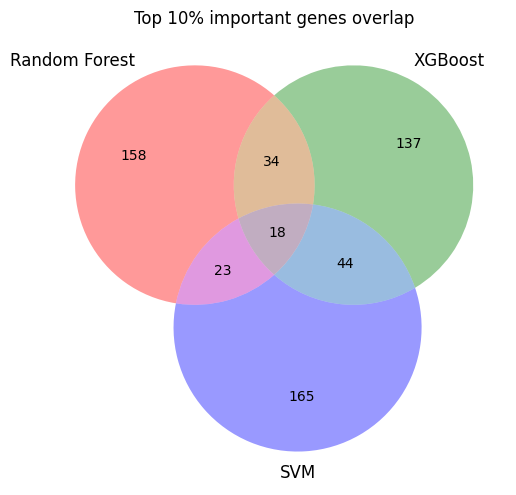

In [114]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

# 例如你想看 Random Forest, XGBoost, SVM 三个模型
models_for_venn = ["Random Forest", "XGBoost", "SVM"]

sets = [model_top_genes[m] for m in models_for_venn]

plt.figure(figsize=(6, 6))

if len(models_for_venn) == 2:
    venn2(subsets=sets, set_labels=models_for_venn)
elif len(models_for_venn) == 3:
    venn3(subsets=sets, set_labels=models_for_venn)
else:
    raise ValueError("Venn 只能画 2 或 3 个集合，请调整 models_for_venn 的长度。")

plt.title("Top 10% important genes overlap")
plt.show()


/home/peigao/miniconda3/lib/python3.13/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/peigao/miniconda3/lib/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inp

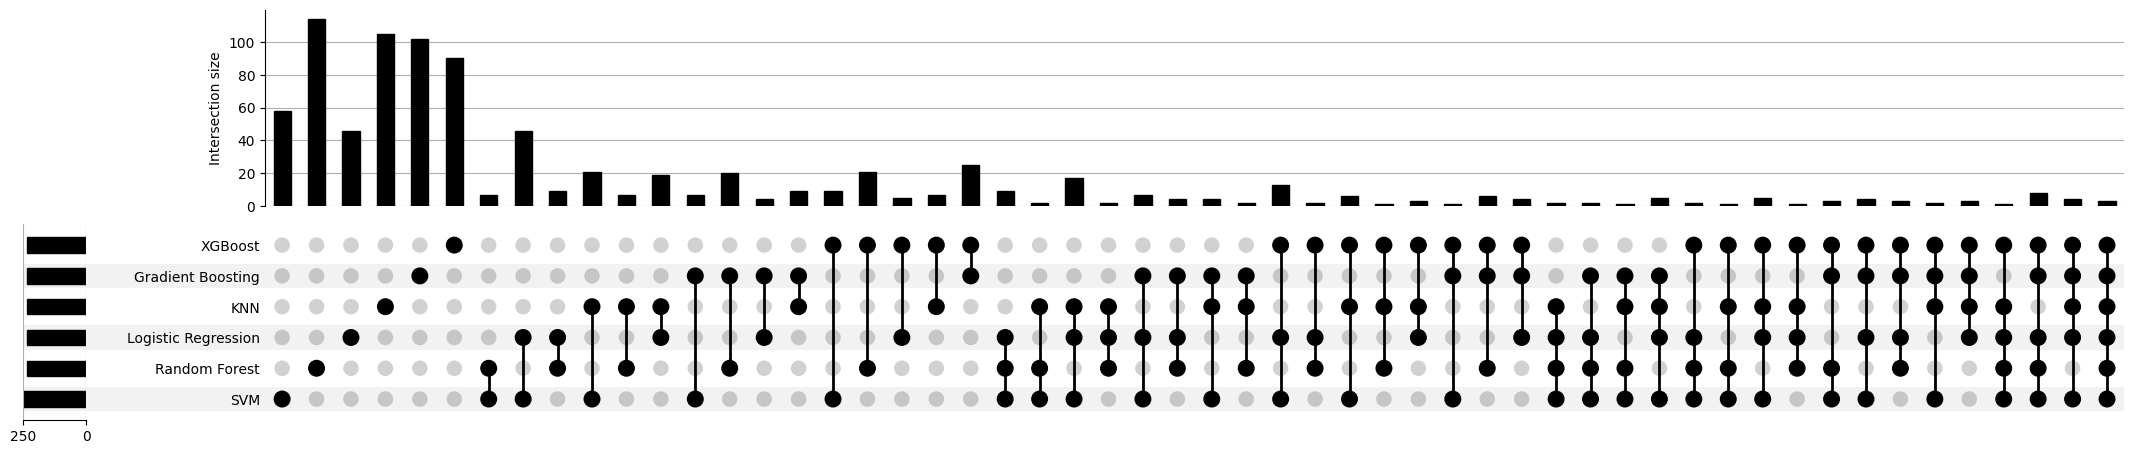

In [117]:
from upsetplot import from_contents, UpSet

upset_data = from_contents(model_top_genes)
UpSet(upset_data).plot()
plt.show()


所有模型共同的重要基因数量: 3
['KRT23', 'CCL20', 'DMBT1']


In [ ]:
from collections import Counter
# common_genes = set.intersection(*model_top_genes.values())

# print("所有模型共同的重要基因数量:", len(common_genes))
# print(list(common_genes))

# 统计每个基因在多少个模型中出现
gene_counter = Counter()

for model_name, gene_set in model_top_genes.items():
    gene_counter.update(gene_set)

# 至少在 4 个模型中出现
genes_in_4plus_models = [gene for gene, count in gene_counter.items() if count >= 4]

print("至少 4 个模型认为重要的基因数量:", len(genes_in_4plus_models))
print("示例:", genes_in_4plus_models[:30])


至少 4 个模型认为重要的基因数量: 50
示例: ['DMBT1', 'KRT23', 'FOXL1', 'CHGB', 'IGHG1', 'SFRP1', 'LCN2', 'TM4SF1', 'RAB3B', 'RGS4', 'PCSK2', 'S100A6', 'RGS5', 'B4GALT4', 'CDK14', 'EPHB2', 'SULT1B1', 'IFIT1', 'BNIP5', 'SYT11', 'ARHGAP29', 'CEACAM6', 'EPSTI1', 'NPR3', 'CXCL8', 'FADS2', 'CCL20', 'SLC26A9', 'CDH17', 'MXRA5']


In [ ]:
import gseapy as gp
import pandas as pd
# 至少 4 个模型认为重要的基因
# genes_in_4plus_models 是一个 list 或 set
gene_list = list(genes_in_4plus_models)
print("交集基因数:", len(gene_list))
print(gene_list[:10])

gene_sets = [
    "GO_Biological_Process_2021",
    "GO_Molecular_Function_2021",
    "GO_Cellular_Component_2021",
]

enr = gp.enrichr(
    gene_list=gene_list,
    gene_sets=gene_sets,
    organism="Human",   # 人类
    cutoff=0.05         # 默认以 Adjusted P-value / FDR 过滤
)

# 结果 DataFrame
go_res = enr.results
print(go_res.head())

# 生物学过程（BP）
res_bp = go_res[go_res["Gene_set"] == "GO_Biological_Process_2021"] \
             .sort_values("Adjusted P-value")
# 分子功能（MF）
res_mf = go_res[go_res["Gene_set"] == "GO_Molecular_Function_2021"] \
             .sort_values("Adjusted P-value")
# 细胞组分（CC）
res_cc = go_res[go_res["Gene_set"] == "GO_Cellular_Component_2021"] \
             .sort_values("Adjusted P-value")

print("BP 前10条：")
print(res_bp.head(10)[["Term", "Adjusted P-value", "Overlap", "Genes"]])

def filter_by_overlap(df, min_genes=2):
    """
    过滤掉重叠基因数 < min_genes 的条目。
    min_genes=2 表示至少要命中 2 个基因。
    """
    df = df.copy()
    df["Overlap_gene_count"] = df["Overlap"].apply(lambda x: int(x.split("/")[0]))
    df = df[df["Overlap_gene_count"] >= min_genes]
    return df.drop(columns=["Overlap_gene_count"])
res_bp_filt = filter_by_overlap(res_bp, min_genes=2)
res_mf_filt = filter_by_overlap(res_mf, min_genes=2)
res_cc_filt = filter_by_overlap(res_cc, min_genes=2)

print("过滤后 BP 条目数:", res_bp_filt.shape[0])
print("过滤后 MF 条目数:", res_mf_filt.shape[0])
print("过滤后 CC 条目数:", res_cc_filt.shape[0])

# 导出到文件，方便看表或丢给 R/Excel
res_bp_filt.to_csv("GO_BP_enrich_2ndlabel_genes_4plus_models.tsv", sep="\t", index=False)
res_mf_filt.to_csv("GO_MF_enrich_2ndlabel_genes_4plus_models.tsv", sep="\t", index=False)
res_cc_filt.to_csv("GO_CC_enrich_2ndlabel_genes_4plus_models.tsv", sep="\t", index=False)



交集基因数: 50
['DMBT1', 'KRT23', 'FOXL1', 'CHGB', 'IGHG1', 'SFRP1', 'LCN2', 'TM4SF1', 'RAB3B', 'RGS4']
                     Gene_set                                   Term Overlap  \
0  GO_Molecular_Function_2021           zymogen granule (GO:0042588)     1/6   
1  GO_Molecular_Function_2021  zymogen granule membrane (GO:0042589)     1/6   
2  GO_Molecular_Function_2021        inhibitory synapse (GO:0060077)     1/8   
3  GO_Molecular_Function_2021        phagocytic vesicle (GO:0045335)   2/100   
4  GO_Molecular_Function_2021           early phagosome (GO:0032009)    1/12   

    P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0  0.014908            0.3256            0                     0   81.408163   
1  0.014908            0.3256            0                     0   81.408163   
2  0.019829            0.3256            0                     0   58.142857   
3  0.025949            0.3256            0                     0    8.440476   
4  0.029599         